## LV 2.

[1차] 뉴스 클러스터링

https://school.programmers.co.kr/learn/courses/30/lessons/17677

**문제 설명**

    뉴스 클러스터링
    여러 언론사에서 쏟아지는 뉴스, 특히 속보성 뉴스를 보면 비슷비슷한 제목의 기사가 많아 정작 필요한 기사를 찾기가 어렵다. Daum 뉴스의 개발 업무를 맡게 된 신입사원 튜브는 사용자들이 편리하게 다양한 뉴스를 찾아볼 수 있도록 문제점을 개선하는 업무를 맡게 되었다.

    개발의 방향을 잡기 위해 튜브는 우선 최근 화제가 되고 있는 "카카오 신입 개발자 공채" 관련 기사를 검색해보았다.

    카카오 첫 공채..'블라인드' 방식 채용
    카카오, 합병 후 첫 공채.. 블라인드 전형으로 개발자 채용
    카카오, 블라인드 전형으로 신입 개발자 공채
    카카오 공채, 신입 개발자 코딩 능력만 본다
    카카오, 신입 공채.. "코딩 실력만 본다"
    카카오 "코딩 능력만으로 2018 신입 개발자 뽑는다"
    기사의 제목을 기준으로 "블라인드 전형"에 주목하는 기사와 "코딩 테스트"에 주목하는 기사로 나뉘는 걸 발견했다. 튜브는 이들을 각각 묶어서 보여주면 카카오 공채 관련 기사를 찾아보는 사용자에게 유용할 듯싶었다.

    유사한 기사를 묶는 기준을 정하기 위해서 논문과 자료를 조사하던 튜브는 "자카드 유사도"라는 방법을 찾아냈다.

    자카드 유사도는 집합 간의 유사도를 검사하는 여러 방법 중의 하나로 알려져 있다. 두 집합 A, B 사이의 자카드 유사도 J(A, B)는 두 집합의 교집합 크기를 두 집합의 합집합 크기로 나눈 값으로 정의된다.

    예를 들어 집합 A = {1, 2, 3}, 집합 B = {2, 3, 4}라고 할 때, 교집합 A ∩ B = {2, 3}, 합집합 A ∪ B = {1, 2, 3, 4}이 되므로, 집합 A, B 사이의 자카드 유사도 J(A, B) = 2/4 = 0.5가 된다. 집합 A와 집합 B가 모두 공집합일 경우에는 나눗셈이 정의되지 않으니 따로 J(A, B) = 1로 정의한다.

    자카드 유사도는 원소의 중복을 허용하는 다중집합에 대해서 확장할 수 있다. 다중집합 A는 원소 "1"을 3개 가지고 있고, 다중집합 B는 원소 "1"을 5개 가지고 있다고 하자. 이 다중집합의 교집합 A ∩ B는 원소 "1"을 min(3, 5)인 3개, 합집합 A ∪ B는 원소 "1"을 max(3, 5)인 5개 가지게 된다. 다중집합 A = {1, 1, 2, 2, 3}, 다중집합 B = {1, 2, 2, 4, 5}라고 하면, 교집합 A ∩ B = {1, 2, 2}, 합집합 A ∪ B = {1, 1, 2, 2, 3, 4, 5}가 되므로, 자카드 유사도 J(A, B) = 3/7, 약 0.42가 된다.

    이를 이용하여 문자열 사이의 유사도를 계산하는데 이용할 수 있다. 문자열 "FRANCE"와 "FRENCH"가 주어졌을 때, 이를 두 글자씩 끊어서 다중집합을 만들 수 있다. 각각 {FR, RA, AN, NC, CE}, {FR, RE, EN, NC, CH}가 되며, 교집합은 {FR, NC}, 합집합은 {FR, RA, AN, NC, CE, RE, EN, CH}가 되므로, 두 문자열 사이의 자카드 유사도 J("FRANCE", "FRENCH") = 2/8 = 0.25가 된다.
    
    
**입력 형식**

    입력으로는 str1과 str2의 두 문자열이 들어온다. 각 문자열의 길이는 2 이상, 1,000 이하이다.
    입력으로 들어온 문자열은 두 글자씩 끊어서 다중집합의 원소로 만든다. 이때 영문자로 된 글자 쌍만 유효하고, 기타 공백이나 숫자, 특수 문자가 들어있는 경우는 그 글자 쌍을 버린다. 예를 들어 "ab+"가 입력으로 들어오면, "ab"만 다중집합의 원소로 삼고, "b+"는 버린다.
    다중집합 원소 사이를 비교할 때, 대문자와 소문자의 차이는 무시한다. "AB"와 "Ab", "ab"는 같은 원소로 취급한다.
    
    
**출력 형식**

    입력으로 들어온 두 문자열의 자카드 유사도를 출력한다. 유사도 값은 0에서 1 사이의 실수이므로, 이를 다루기 쉽도록 65536을 곱한 후에 소수점 아래를 버리고 정수부만 출력한다.
    

**예제 입출력**

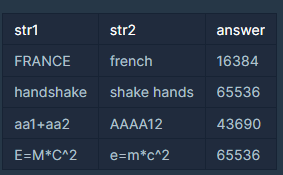

In [101]:
import math

def get_str_lst(string):
    string = string.upper()
    str_lst = []
    for idx in range(len(string)-1):
        s = string[idx:idx+2]
        if s.isalpha():
            str_lst.append(s)
    if len(str_lst)!=0:
        if len(str_lst[-1])!=2:
            str_lst.pop()
    return str_lst 

def solution(str1, str2):
    answer = 0
    
    str1_lst = get_str_lst(str1)
    str2_lst = get_str_lst(str2)
    
    intersection = set(str1_lst).intersection(set(str2_lst))
    union = set(str_lst).union(set(str2_lst))

    intersection_cnt = sum([min(str1_lst.count(i), str2_lst.count(i)) for i in intersection])
    union_cnt = sum([max(str1_lst.count(u), str2_lst.count(u)) for u in union])
    
    try:
        answer = math.floor((intersection_cnt/union_cnt)*65536)
    except:
        answer = 65536
    
    return answer

In [102]:
print(solution("FRANCE", "french"))
print(solution("handshake", "shake hands"))
print(solution("aa1+aa2", "AAAA12"))
print(solution("E=M*C^2", "e=m*c^2"))

26214
65536
43690
65536


In [126]:
import math

def solution(str1, str2):
    answer = 0
    str1, str2 = str1.upper(), str2.upper()
    str1_lst, str2_lst = list(), list()

    for idx in range(len(str1)-1):
        if str1[idx].isalpha() & str1[idx+1].isalpha():
            str1_lst.append(str1[idx:idx+2])
            
    for idx in range(len(str2)-1):
        if str2[idx].isalpha() & str2[idx+1].isalpha():
            str2_lst.append(str2[idx:idx+2])

    intersection = set(str1_lst).intersection(set(str2_lst))
    union = set(str1_lst).union(set(str2_lst))
    
    intersection_cnt = sum([min(str1_lst.count(i), str2_lst.count(i)) for i in intersection])
    union_cnt = sum([max(str1_lst.count(u), str2_lst.count(u)) for u in union])
    
    try:
        answer = math.floor((intersection_cnt/union_cnt)*65536)
    except:
        answer = 65536
    
    return answer

In [125]:
print(solution("FRANCE", "french"))
print(solution("handshake", "shake hands"))
print(solution("aa1+aa2", "AAAA12"))
print(solution("E=M*C^2", "e=m*c^2"))

{'NC', 'FR'}
{'AN', 'RA', 'CH', 'NC', 'FR', 'CE', 'RE', 'EN'}
16384
{'DS', 'AN', 'AK', 'HA', 'ND', 'KE', 'SH'}
{'DS', 'AN', 'AK', 'HA', 'ND', 'KE', 'SH'}
65536
{'AA'}
{'AA'}
43690
set()
set()
65536


In [80]:
import math

def get_str(string):
    string = string.upper()
    str_lst = []
    for idx in range(len(string)-1):
        s = string[idx:idx+2]
        if s.isalpha():
            str_lst.append(s)
    if len(str_lst)!=0:
        if len(str_lst[-1])!=2:
            str_lst.pop()
    return str_lst 

str1_lst = get_str("aa1+aa2")
str2_lst = get_str("AAAA12")

intersection = set(str1_lst).intersection(str2_lst)
union = set(str1_lst).union(set(str2_lst))

try :
    intersection_cnt = sum([min(str1_lst.count(i), str2_lst.count(i)) for i in intersection])
    union_cnt = sum([max(str1_lst.count(u), str2_lst.count(u)) for u in union])

except:
    answer= 65536
    
answer = math.floor((intersection_cnt/union_cnt)*65536)
answer

43690

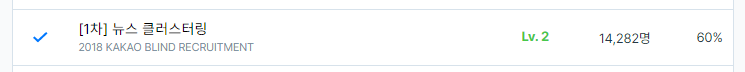

    카카오 문제 골때린다..
  
**다른 사람 풀이**

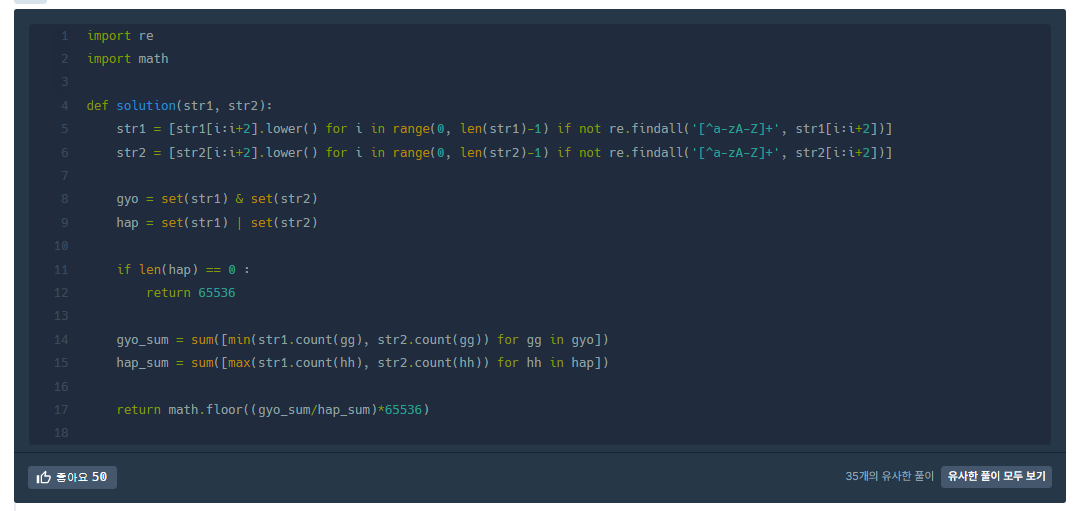

In [127]:

import re
import math

def solution(str1, str2):
    str1 = [str1[i:i+2].lower() for i in range(0, len(str1)-1) if not re.findall('[^a-zA-Z]+', str1[i:i+2])]
    str2 = [str2[i:i+2].lower() for i in range(0, len(str2)-1) if not re.findall('[^a-zA-Z]+', str2[i:i+2])]

    gyo = set(str1) & set(str2)
    hap = set(str1) | set(str2)

    if len(hap) == 0 :
        return 65536

    gyo_sum = sum([min(str1.count(gg), str2.count(gg)) for gg in gyo])
    hap_sum = sum([max(str1.count(hh), str2.count(hh)) for hh in hap])

    return math.floor((gyo_sum/hap_sum)*65536)

    - 정규표현식으로 끝내버리네.. 골 때린다
